<a href="https://colab.research.google.com/github/Git-onga/colab-notebooks-on-ML/blob/main/pumpkins-analysis%20/Pumpkins_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Case study**: 'the pumpkin market'
In this notebook I will use the US-pumpkins.csv which includes 1757 lines of data about the market for pumpkins, sorted into groupings by city. This is raw data extracted from the Specialty Crops Terminal Markets Standard Reports distributed by the United States Department of Agriculture.

**Objective:**  The objective of this model is to determine which month is the best time to get the cheapest price sold in the Us.

In [2]:
from google.colab import files
uploaded = files.upload()

Saving US-pumpkins.csv to US-pumpkins.csv


After importing the data, loading the data using pandas and printing the first few rows using `.head()`.

In [4]:
import pandas as pd

df = pd.read_csv("US-pumpkins.csv")
df.head()

,City Name,Type,Package,Variety,Sub Variety,Grade,Date,Low Price,High Price,Mostly Low,...,Unit of Sale,Quality,Condition,Appearance,Storage,Crop,Repack,Trans Mode,Unnamed: 24,Unnamed: 25
0,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,4/29/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
1,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,5/6/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
2,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
3,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
4,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,11/5/16,90.0,100.0,90.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN


Remember the objective is to find month with the least pricing on the pumpkins. Since the dataframe does not have a column for the month just the date and the price seams negotiable depending on the day we will have to find average price of the pumpkin and get the month it was sold.

Algorithim:



1.   Average price for each pumpkins using the Low and High price column.
1.   We will need a new column month which we can extract form
the existing data column.
2.   Drop all the columns that we will not be using for now.
3.   Deal with the inconsistencies with the package sizes.









In [10]:
# Step 1: Calculate the avarage price for each pampkins
price = (df['Low Price'] + df['High Price']) / 2

# Step 2: Add a new column for Months
month = pd.DatetimeIndex(df['Date']).month

# Step 3: Select only the columns you need
new_pumpkins = pd.DataFrame({'Month': month, 'Package': df['Package'], 'Low Price': df['Low Price'],'High Price': df['High Price'], 'Price': price})
new_pumpkins.tail()

,Month,Package,Low Price,High Price,Price
1752,9,22 lb cartons,14.75,14.75,14.75
1753,9,36 inch bins,275.00,275.00,275.00
1754,9,36 inch bins,275.00,275.00,275.00
1755,9,36 inch bins,275.00,275.00,275.00
1756,9,36 inch bins,275.00,275.00,275.00


**Note something**

If you look at the Package column, pumpkins are sold in many different configurations. Digging into the original data, it's interesting that anything with Unit of Sale equalling 'EACH' or 'PER BIN' also have the Package type per inch, per bin, or 'each'. Pumpkins seem to be very hard to weigh consistently, so let's filter them by selecting only pumpkins with the string 'bushel' in their Package column.

In [12]:
new_pumpkins = new_pumpkins[new_pumpkins['Package'].str.contains('bushel', case=True, regex=True)]
new_pumpkins.head()

,Month,Package,Low Price,High Price,Price
70,9,1 1/9 bushel cartons,15.0,15.0,15.0
71,9,1 1/9 bushel cartons,18.0,18.0,18.0
72,10,1 1/9 bushel cartons,18.0,18.0,18.0
73,10,1 1/9 bushel cartons,17.0,17.0,17.0
74,10,1 1/9 bushel cartons,15.0,15.0,15.0


Now we look at how many empty cells are in our data.

In [13]:
new_pumpkins.isnull().sum()

,0
Month,0
Package,0
Low Price,0
High Price,0
Price,0


This is good, so apparently our columns have no empty cells which means we don't have to clean the data.

But we still have inconsistencies with the the package columns. There are pumpkin packages that are sold 1/2 and 1 1/9 bushel cartons. We need to normalize the pricing so that you show the pricing per bushel, so do some math to standardize it.

In [14]:
new_pumpkins.loc[new_pumpkins['Package'].str.contains('1 1/9'), 'Price'] = price/(1 + 1/9)

new_pumpkins.loc[new_pumpkins['Package'].str.contains('1/2'), 'Price'] = price/(1/2)

Now we print the data to ensure there is no inconsistencies.

In [17]:
new_pumpkins.tail()

,Month,Package,Low Price,High Price,Price
1738,9,1/2 bushel cartons,15.00,15.0,30.00
1739,9,1/2 bushel cartons,13.75,15.0,28.75
1740,9,1/2 bushel cartons,10.75,15.0,25.75
1741,9,1/2 bushel cartons,12.00,12.0,24.00
1742,9,1/2 bushel cartons,12.00,12.0,24.00


Now we plot a graph to visualize the data we have analyse.

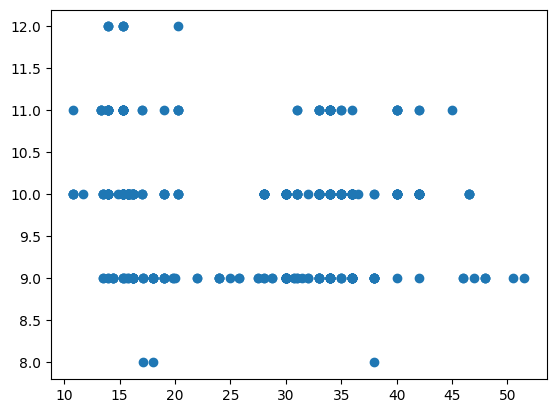

In [13]:
import matplotlib.pyplot as plt

price = new_pumpkins.Price
month = new_pumpkins.Month
plt.scatter(price, month)
plt.show()

From the scatter plot it is difficult to tell which is the month with the least or the highest in terms of pricing pumkins. We can instead use a bar graph for ease of interpertation.

Text(0, 0.5, 'Pumpkin Price')

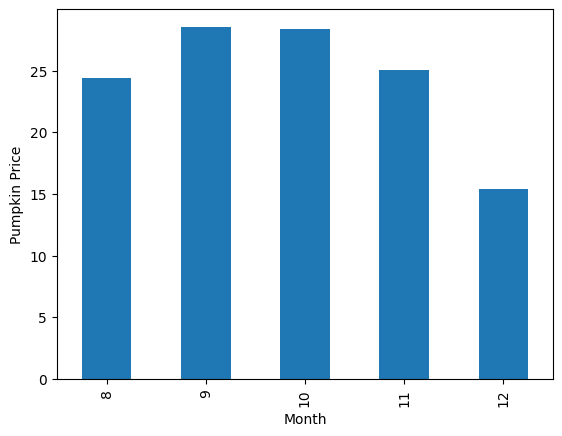

In [14]:
new_pumpkins.groupby(['Month'])['Price'].mean().plot(kind='bar')
plt.ylabel("Pumpkin Price")